In [58]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture
from sklearn.cluster import KMeans

data=pd.read_csv('../input/heartdisease-2/heart_disease.csv')
labels=data.values[:,-1]
labels = labels.astype(int)
data=data.values[:,:-1]

In [59]:
def PCA(data, n_components):
    data_st = (data - np.mean(data)) / np.std(data)
    cov_mat = np.cov(data_st, rowvar=False)
    eig_vals, eig_vecs = np.linalg.eig(cov_mat)
    sorted_inds = np.argsort(eig_vals)[::-1]
    sorted_eig_vals = eig_vals[sorted_inds]
    sorted_eig_vecs = eig_vecs[:,sorted_inds]
    top_eig_vecs = sorted_eig_vecs[:,0:n_components]
    return data_st @ top_eig_vecs

In [60]:
n_comps = 2
k = 3
data_pca = PCA(data, n_comps)

In [61]:
gm = GaussianMixture(n_components=k).fit(data_pca)
print(f"GaussianMixture centers:\n {gm.means_}")
km = KMeans(n_clusters=k).fit(data_pca)
print(f"KMeans centers:\n {km.cluster_centers_}")

GaussianMixture centers:
 [[ 2.11720799 -1.22379123]
 [ 2.74802745 -1.14864213]
 [ 2.94352515 -1.42482389]]
KMeans centers:
 [[ 1.97964665 -1.26594242]
 [ 3.5762764  -1.26371035]
 [ 2.684027   -1.22960627]]


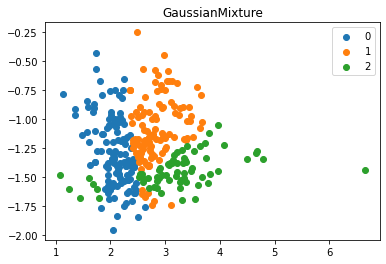

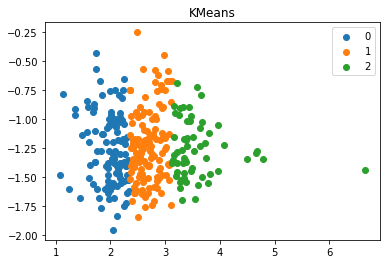

In [62]:
gm_p = GaussianMixture(n_components=k).fit_predict(data_pca)
fig1 = plt.figure("Figure 1")
for i in range(k):
    plt.scatter(data_pca[gm_p == i, 0], data_pca[gm_p == i, 1], label = i)
plt.legend()
plt.title("GaussianMixture")
plt.show()

km_p = KMeans(n_clusters=k).fit_predict(data_pca)
fig2 = plt.figure("Figure 2")
for i in range(k):
    plt.scatter(data_pca[km_p == i, 0], data_pca[km_p == i, 1], label = i)
plt.legend()
plt.title("KMeans")
plt.show()

KMeans results in a very different clustering than GaussianMixture.

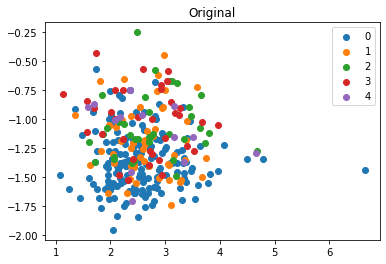

In [63]:
unique_labels = np.unique(labels)
fig3 = plt.figure("Figure 3")
for i in unique_labels:
    plt.scatter(data_pca[labels == i, 0], data_pca[labels == i, 1], label = i)
plt.legend()
plt.title("Original")
plt.show()